In [55]:
print("Sian")

Sian


In [1]:
# determine the extreme values of points 
import csv

trajfile = "2019-9-10-12-0-0-BF1-CL1-Traj(0-18000frames).csv"

with open(trajfile) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count ==0:
            line_count = line_count+1
            continue
        # init 
        if line_count==1:
            xmax = float(row[6])
            xmin = float(row[6])
            ymax = float(row[7])
            ymin = float(row[7])
        # x, y vals 
        xval = float(row[6])
        yval = float(row[7])
        if xval > xmax:
            xmax = xval
        if xval < xmin:
            xmin = xval
        if yval > ymax:
            ymax = yval
        if yval < ymin:
            ymin = yval
            
        line_count = line_count+1


In [1]:
line_count

NameError: name 'line_count' is not defined

In [3]:
xmax

160.0

In [2]:
import numpy as np
xmax = np.ceil(float(xmax))
ymax = np.ceil(float(ymax))

xmin = np.floor(float(xmin))
ymin = np.floor(float(ymin))

ymax = ymax+1
xmax = xmax+1


In [11]:
xmax

160.0

In [4]:

# december step 1

dcmap1 = {}
ind= 0

for ix in range(int(xmin), int(xmax)):
    for iy in range(int(ymin), int(ymax)):
        myvec=[]
        myvec.append(ix)
        myvec.append(iy)
        dcmap1[ind]=myvec
        ind=ind+1


In [7]:
ind

36712

In [5]:
# initialize 

# combine steps 

# december step 2 
dlookupdict={}
dinvlookupdict={}

for i in range(36712):
    dlookupdict[i] = dcmap1[i]
    p1 = dcmap1[i][0]
    p2 = dcmap1[i][1]
    dinvlookupdict[(p1,p2)]=i

# december step 3

dtrajcount={}
# xmin, xmax, ymin, ymax

# change range to -10, 10
range1 = 10 

for i in range(36712):
    p = dlookupdict[i]
    px = p[0]
    py = p[1]
    if i==24000:
        print(24000)
    # calculate x between i.x - 5, i.x+5
    for j in range(-range1, range1+ 1):
        jx = px+j
        if jx>xmax-1 or jx<xmin: # check if pts in range
            continue
        # calculate y between i.y-5, i.y+5 
        for k in range(-range1, range1+1):
            jy = py+k
            # check if pts are in range
            if jy>ymax-1 or jy<ymin:
                continue
            # inv dict lookup
            p2 = dinvlookupdict[(jx, jy)]
            # save trajcount1[(i, p2)]
            dtrajcount[(i, p2)]=0


24000


In [17]:
# december step 3: reset dtrajcount to 0s 

dtrajcount={}
# xmin, xmax, ymin, ymax

# change range to -10, 10
range1 = 10 

for i in range(36712):
    p = dlookupdict[i]
    px = p[0]
    py = p[1]
    if i==24000:
        print(24000)
    # calculate x between i.x - 5, i.x+5
    for j in range(-range1, range1+ 1):
        jx = px+j
        if jx>xmax-1 or jx<xmin: # check if pts in range
            continue
        # calculate y between i.y-5, i.y+5 
        for k in range(-range1, range1+1):
            jy = py+k
            # check if pts are in range
            if jy>ymax-1 or jy<ymin:
                continue
            # inv dict lookup
            p2 = dinvlookupdict[(jx, jy)]
            # save trajcount1[(i, p2)]
            dtrajcount[(i, p2)]=0


24000


In [13]:
.1e6

100000.0

In [19]:
import csv 

In [15]:
# create new file for filling in the timestamps
dectfile = "dec2019/Ramp/2019-9-9-15-0-0-BF1-CL1-Traj(0-18000frames)Ramp.csv"

dectfile2= "dec2019/Ramp/TimestampsFilledRamp.csv"

import csv 

with open(dectfile2, 'w') as wfile:
    csv_writer = csv.writer(wfile)
    
    with open(dectfile) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count ==0:
                csv_writer.writerow(row)
                line_count = line_count+1 
                continue
            # store the prev timestamp
            ts = float(row[2])
            
            row1 = row
            if ts ==0 :
                ts1 = previous_ts + .1e6  
                ts = ts1
                row1[2] = ts1 
                csv_writer.writerow(row1)
            else:
                csv_writer.writerow(row)
            print(ts)
            previous_ts = float(row[2])
            
            if line_count==28:
                break
            
            line_count = line_count+1


1141630.0
1240720.0
1338290.0
1437440.0
1536580.0
1636010.0
1735370.0
1836180.0
1935650.0
2032760.0
2134660.0
2234250.0
1160520.0
1263040.0
1365890.0
1467030.0
1567220.0
1668690.0
1767840.0
1868370.0
1968510.0
2069820.0
2171060.0
2271060.0
2372010.0
2472010.0
2570030.0
1428070.0


In [ ]:
# dec step 4 b : dynamic time 

# using timestamps 

# 0.1 , 0.2., 0.5 

In [ ]:
xmin = -100
xmax = 109
ymin=-87
ymax =116


In [ ]:
# find out how to measure accuracy 

# a: use the scores divided by the # of pts in cluster, to evaluate the accuracy 

# b: divide space into lanes , associate directions with the positions 
# analyze one section of the space first 


 # section of space to be analyzed based on the usual length of a trajectory
# based on orig_method_960to985.png
xlim1 = -50
xlim2 = 90
ylim1 = 0 
ylim2 = 22


In [ ]:
# calculate the jumps

jumpthreshold =10 



In [56]:
# try calculating least squares regression error

from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X = [1,2,3,4,5,6,7,8]
y = [2,3,4,5,6,7,8,9]

X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1
)

lr = LinearRegression()
lr.fit(X, y)
print(lr.score(X, y))

0.997790291438


array([ -26.76938706,   20.6715239 ,  -61.41392253,  -15.92798116,
        186.76014964,   -5.84613003,  -49.01594134,  144.83985375,
         50.62143795,  164.46179248, -206.18715001,   23.28605481,
         64.985374  ,   -7.51397738,  -75.45070245,  -71.74608535,
        -76.15795798,   81.1225618 ,  -41.47363832,  -55.23420476,
          4.89047099,  102.35499458, -100.72056154,  -65.39899685,
         73.71625804, -181.52752617,   47.97805898,  -56.60306427,
         98.02256459,  -85.79111447,  -99.88352074,  -28.72597902,
        152.8564725 ,   86.4353764 ,   60.38888092,  144.66311336,
        -97.97374352,  -33.55435009,  -97.80486013,  -64.36936601,
         54.21739344,    2.91855365,   22.36423953,  131.25411321,
        -61.47356951,   15.85043898,  -33.5680284 ,   -5.25351985,
        -24.45871006,  -64.0756542 ])

In [52]:
from numpy import *
#y1 = array[1,2,3,4,5]

y1= np.array([0.0, 0.0, 1, 1])

In [78]:
lr2.fit(x3,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
x3=x2.reshape((7,1))
x3.shape

(7, 1)

In [67]:
y2 = np.array([0,1,2,3,4,5,6])
x2 = np.array([[1,2,3,4,5,6,7]])

x2.reshape(7,1)

lr2 = LinearRegression()
lr2.fit(x2, y2)
print(lr.score(x2, y2))


ValueError: Found input variables with inconsistent numbers of samples: [1, 7]

In [92]:
axv = np.array(xv)
axv.shape[0]
ayv = np.array(yv)

In [96]:
# accuracy test on trajectory 

axv1 =axv.reshape(axv.shape[0],1)

lr = LinearRegression()
lr.fit(axv1, ayv)
print(lr.score(axv1, ayv))

y_pred = lr.predict(axv1)

0.023767634981


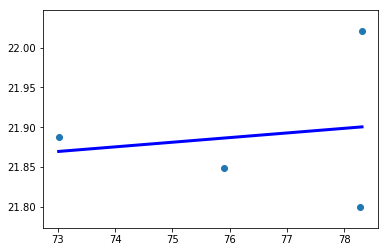

In [99]:
plt.scatter(axv1, ayv)
plt.plot(axv1, y_pred, color='blue', linewidth=3)
plt.show()

0.249801454731


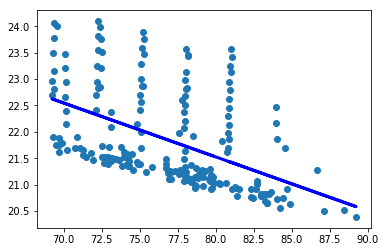

In [101]:
arrhx = np.array(arrhxvalues)
arrhy = np.array(arrhyvalues)
arrhx1 = arrhx.reshape(arrhx.shape[0],1)

lr = LinearRegression()
lr.fit(arrhx1, arrhy)
print(lr.score(arrhx1, arrhy))

hy_pred = lr.predict(arrhx1)

plt.scatter(arrhxvalues, arrhyvalues)
plt.plot(arrhx1, hy_pred, color='blue', linewidth=3)

plt.show()


In [1]:
int(31.2)

31

In [115]:
# accuracy method 2
# random sample of points : 1/10 of actual size

onetenth = int(0.1*(arrhx.shape[0]))

total_el = int(arrhx.shape[0])

indices = np.random.randint(total_el, size=onetenth)

xtake = np.take(arrhx, indices)
ytake = np.take(arrhy, indices)
# must sample from each cluster in step 5 alg. 

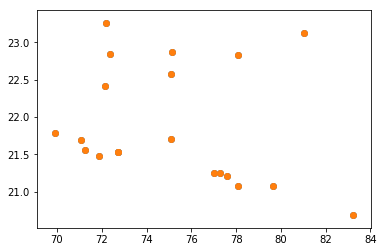

In [117]:
plt.scatter(xtake, ytake)
plt.show()

In [ ]:
# accuracy method 3 
# take the next medians 

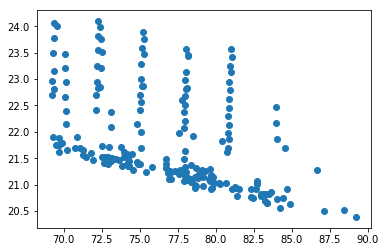

In [100]:
plt.scatter(arrhxvalues, arrhyvalues)
plt.show()

In [44]:
# reshape the array
y.reshape((50,1))

array([[ -26.76938706],
       [  20.6715239 ],
       [ -61.41392253],
       [ -15.92798116],
       [ 186.76014964],
       [  -5.84613003],
       [ -49.01594134],
       [ 144.83985375],
       [  50.62143795],
       [ 164.46179248],
       [-206.18715001],
       [  23.28605481],
       [  64.985374  ],
       [  -7.51397738],
       [ -75.45070245],
       [ -71.74608535],
       [ -76.15795798],
       [  81.1225618 ],
       [ -41.47363832],
       [ -55.23420476],
       [   4.89047099],
       [ 102.35499458],
       [-100.72056154],
       [ -65.39899685],
       [  73.71625804],
       [-181.52752617],
       [  47.97805898],
       [ -56.60306427],
       [  98.02256459],
       [ -85.79111447],
       [ -99.88352074],
       [ -28.72597902],
       [ 152.8564725 ],
       [  86.4353764 ],
       [  60.38888092],
       [ 144.66311336],
       [ -97.97374352],
       [ -33.55435009],
       [ -97.80486013],
       [ -64.36936601],
       [  54.21739344],
       [   2.918

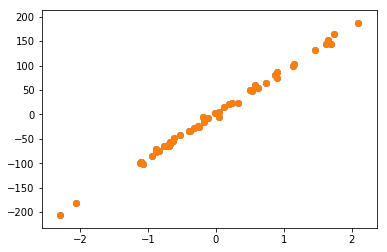

In [34]:
plt.scatter(X, y)
plt.show()

In [22]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3

In [31]:
import pandas as pd
data = [[1,1], [2,2], [3,4],[9,1]]
df = pd.DataFrame(data, columns=['xv', 'yv'])
#df

LR1 = LinearRegression()
LR1.fit(df[['xv']], df['yv'])
LR1.score(df[['xv']], df['yv'])


0.068817204301075297

In [67]:
# determine avg trajectory length

tfile =  "2019-9-10-12-0-0-BF1-CL1-Traj(0-18000frames).csv"

import math
import csv

trajnum = 0 
tnum = 2

irow =0

outlier =0
firstrow=0
itrajlen =0
tlengths = []


with open(tfile) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    
    for row in csv_reader:
        if firstrow==0:
            firstrow=1
            continue
        
        trajnum = row[0] 
        # check for next trajectory number
        
        if tnum!=trajnum:
            tlengths.append(itrajlen)
            tnum = trajnum
            itrajlen=0
        itrajlen= itrajlen+1
        
        #irow= irow+1
        #if irow>100:
         #   break
        
        
            

In [65]:
tlengths

[22, 39, 33]

In [68]:
tlengths = tlengths[1:]

In [76]:
len(tlengths)

5113

In [69]:
np.mean(tlengths)

28.7872090749071

In [75]:
import scipy
from scipy import stats
stats.mode(tlengths)

ModeResult(mode=array([17]), count=array([234]))

In [84]:
a = [1,1,1,2,3, 2, 2, 2,2,4,5]
a = list(a)

In [86]:
tlenlist = list(tlengths)

In [87]:
max(set(tlenlist), key=tlenlist.count)

17

In [6]:
# train with trajectory

# dec step 3.b
listoutliers = []
rangeoutliers = {}
doutlier = {}
listoutliers2 = {}

# step 4 

#tfile = "dec2019/Ramp/2019-9-9-15-0-0-BF1-CL1-Traj(0-18000frames)Ramp.csv"
tfile =  "2019-9-10-12-0-0-BF1-CL1-Traj(0-18000frames).csv"

import math
import csv

trajnum = 0 
obnum = 1

irow =0

outlier =0


with open(tfile) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        irow=irow+1
        trajnum = row[0]
        frameindex = row[17]
        #print("frame:",frameindex)
        if line_count==0:
            line_count=line_count+1
            continue
        if line_count==1:
            line_count=line_count+1
            prevrow = row
            prevx = float(prevrow[6])
            prevy = float(prevrow[7])
            # use round instead of floor
            pfx = round(prevx)
            pfy = round(prevy)
            continue
        # skip if timestamp is 0
        #timest = float(row[2])
        #if timest==0:
        #    continue
        currx =float(row[6])
        curry =float(row[7])
        # instead of floor, use round
        fx = round(currx)
        fy = round(curry)
        if pfx==fx and pfy==fy:
            prevframe=frameindex
            line_count = line_count + 1
            continue
        if obnum != trajnum:
            pfx = fx
            pfy= fy
            obnum = trajnum
            prevtrajnum = trajnum
            prevframe=frameindex
            line_count = line_count+1
            continue
        # now save to the map(i,j)
        # debug
        
        fromi = dinvlookupdict[(pfx,pfy)]
        #topt = []
        toi = dinvlookupdict[(fx,fy)]
        #check if in range 
        if abs(pfx - fx) >10 or abs(pfy - fy) > 10:
            xr1 = fx - pfx
            yr1 = fy - pfy
            if [pfx, pfy] in listoutliers:
                # get the list of points + their counts
                #listptcount = doutlier[fromi]
                arrayptcount = listoutliers2[fromi]
                if [fx, fy] in arrayptcount:
                    doutlier[fromi, toi] = doutlier[fromi, toi]+1
                else:
                    arrayptcount.append([fx,fy])
                    listoutliers2[fromi] = arrayptcount 
                    doutlier[fromi, toi] = 1 
            #add to outliers 
            else:
                if len(listoutliers) ==0 :
                    #print("hi 0")
                    listoutliers = [[pfx, pfy]]
                    listoutliers2[fromi] = [[fx, fy]]
                    doutlier[fromi, toi] = 1
                    continue
                print("hi 1")
                listoutliers.append([pfx, pfy])
                listoutliers2[fromi] = [[fx, fy]]
                doutlier[fromi, toi] = 1 
            # print to keep track 
            #print("pfx, pfy", pfx, pfy)
            #print("fx, fy", fx, fy)
            line_count = line_count + 1
            # skip normal step
            continue

        mcount = dtrajcount[(fromi,toi)]
        if mcount >100:
            print("fromi",fromi)
            print("mcount", mcount)
        dtrajcount[(fromi, toi)] = mcount+1
        # set previous
        pfx = fx
        pfy = fy
        prevframe = frameindex
        prevtrajnum= trajnum
        line_count=line_count+1


hi 1
hi 1
hi 1
hi 1
hi 1
hi 1
hi 1
hi 1
hi 1
hi 1
hi 1
hi 1
hi 1
hi 1
hi 1
hi 1
hi 1
hi 1
hi 1
fromi 24260
mcount 101
fromi 24259
mcount 101
fromi 24260
mcount 102
fromi 24259
mcount 102
fromi 24260
mcount 103
fromi 24260
mcount 104
fromi 24259
mcount 103
fromi 24260
mcount 105
fromi 24259
mcount 104
fromi 24260
mcount 106
fromi 24259
mcount 105
fromi 24260
mcount 107
fromi 24259
mcount 106
fromi 24260
mcount 108
fromi 24259
mcount 107
fromi 24260
mcount 109
fromi 24259
mcount 108
fromi 24260
mcount 110
fromi 24260
mcount 111
fromi 24260
mcount 112
fromi 24260
mcount 113
fromi 24259
mcount 109
fromi 24259
mcount 110
fromi 24260
mcount 114
fromi 24259
mcount 111
fromi 24260
mcount 115
fromi 24259
mcount 112
fromi 24260
mcount 116
fromi 24259
mcount 113
fromi 24259
mcount 114
fromi 24260
mcount 117
fromi 24259
mcount 115
fromi 24259
mcount 116
fromi 24260
mcount 118
fromi 24259
mcount 117
fromi 24260
mcount 119
fromi 24259
mcount 118
fromi 24260
mcount 120
fromi 24259
mcount 119
fromi 24

In [41]:
ymax

59.0

In [9]:
dhighestfreq(24260)

(145, 24259)

In [35]:
for i in range(1030,1050):
    print(dhighestfreq(i))

(0, 1030)
(0, 1031)
(0, 1032)
(0, 1033)
(0, 1034)
(0, 1035)
(0, 1036)
(0, 1037)
(0, 1038)
(0, 1039)
(0, 1040)
(0, 1041)
(0, 1042)
(0, 1043)
(0, 1044)
(0, 1045)
(0, 1046)
(0, 1047)
(0, 1048)
(0, 1049)


In [8]:
# december highest 
# step 4 b 
            
def dhighestfreq(fromi):
    highest = 0
    indexhighest = fromi
    (px, py) = dlookupdict[fromi]
    for j in range(-10, 11):
        jx = px+j
        if jx>xmax-1 or jx<xmin: # check if pts in range
            continue
        for k in range(-10, 11):
            jy = py+k
            # check if pts are in range
            if jy>ymax-1 or jy<ymin:
                continue
            toi = dinvlookupdict[(jx, jy)]
            t = dtrajcount[(fromi, toi)]
            #if t>0:
                #print(t)
            if t > highest:
                highest=t
                indexhighest=toi
    return highest, indexhighest

In [355]:
incorrect

13

In [283]:
def disjoint(e,f):
    c = e.copy() # [:] works also, but I think this is clearer
    d = f.copy()
    for i in e: # no need for index. just walk each items in the array
        for j in f:
            if i == j: # if there is a match, remove the match.
                c.remove(i)
                d.remove(j)
    return c + d

In [20]:
# disjoint where only find if prev matched not in current
def disjoint1(e,f):
    c = e.copy() # [:] works also, but I think this is clearer
    d = f.copy()
    for i in e:
        for j in f:
            if i==j:
                c.remove(i)
                d.remove(j)
    return c

In [21]:
def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    return unique_list

In [292]:
a = [2,3,4,5,6]
b= [3,4,5,6,7]

a1 = [2,3,3,4,5,6,6]
a2 = unique(a1)

disjoint(a2, b)

[2, 7]

In [342]:
# input params

initialframe = 10
endframe = 13
#####

# method to find new cluster id without parent cluster id 
newclusters = []

newstartframes = [] # corresponding starting frame

# go over datastore file

# ignore the starting point if it does not have a next cluster id 

matchedto = []
prevmatchedto = []
currentclusters = [] # compare with matched previous
unmatched =[]

currframe = initialframe # current frame

with open(datastorename) as datastore_csv_file:
    datastore_csv_reader = csv.reader(datastore_csv_file, delimiter=",")
    
    for row in datastore_csv_reader:
        rownum =rownum+1
        
        # 1 - frame 
        framenum = float(row[0])
        clusterid = float(row[1])
        matched = float(row[18]) 
        
         # if past end frame
        if framenum > endframe:
            break
        
        if framenum < initialframe:
            continue
        
            
        if framenum != currframe:
            if currframe==initialframe:
                prevmatchedto=matchedto
                matchedto=[]
                currentclusters=[]
                currframe = framenum
                continue
            # compare currentclusters and prevmatchedto 
            unmatched = disjoint1(unique(currentclusters), unique(prevmatchedto)) 
            print("current clusters for", currframe, "is:", unique(currentclusters))
            print("prev matched for", currframe, "is:", unique(prevmatchedto))
            print("unmatched:", unmatched)
            for el in unmatched:
                newclusters.append(el)
                newstartframes.append(currframe)
            
            # reset 
            prevmatchedto = matchedto
            matchedto= []
            currentclusters = []
            currframe = framenum
       
        currentclusters.append(clusterid)
        matchedto.append(matched)
        
        
        # check the matched 
        
       
            
        # look for ids that were not mapped to 
        

current clusters for 11.0 is: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
prev matched for 11.0 is: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
unmatched: [7.0]
current clusters for 12.0 is: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
prev matched for 12.0 is: [1.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0]
unmatched: [2.0, 6.0]


In [ ]:
# current clusters for 12 not showing 8 and 9 


In [343]:
newstartframes

[11.0, 12.0, 12.0]

In [344]:
newclusters

[7.0, 2.0, 6.0]

In [337]:
a1 =[1.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0]
a2 = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
disjoint1(a1,a2)

[2.0, 6.0]

In [347]:
totalcomparisons

87

In [ ]:
# function to check where two trajectories merge , based on app results


# change trajectory length to have less errors


In [396]:
# code to find out the num of clusters in the current frame

i = 290 # start frame 
name = "file_out"
name = name+str(i)
name = name+".csv"
firstrow=0

with open(name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")

    for row in csv_reader:
        clusteridfinal = row[0]

print(clusteridfinal)

3


In [22]:
clusteridfinal=7

In [10]:
from collections import defaultdict
import matplotlib.pyplot as plt

search2 =1

datastorename = 'newdatastoreMay17.csv'

incorrect = 0

f is 277
f is 104
f is 119
f is 138
f is 139
f is 142
f is 108
f is 87
f is 66


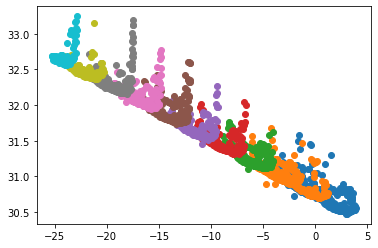

f is 35
f is 26
0 h vals


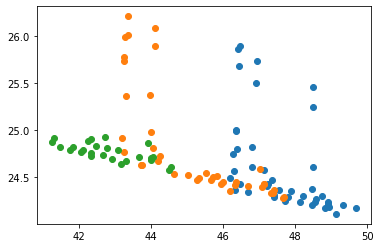

f is 10
0 h vals


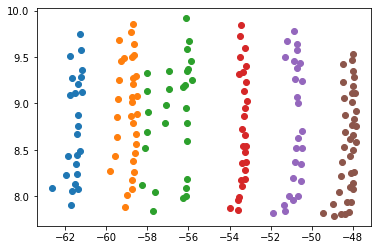

wrong
array1 [3, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
array2 [3, 3.0, 4.0, 4.0, 3.0, 4.0]


In [411]:
# complete procedure 2


# keep count of total number of comparisons + number of incorrect matches
totalcomparisons = 0

c1 = 1
c2 = 3

# new params
totresults = []
totclusterids=[]

#diff. category of accuracy index
missedmatching = 0
wrongmatching =0 # matched to a different cluster
continuedmatching = 0 # continues erroneously 

clustering_error = 0 

#####
initialframe = 290
endframe = 299


for c in range(c1, c2+1):
    arrayx = []
    arrayy=[]

    initialcluster=c

    listclusterids = []

    listclusterids.append(initialcluster)

    obnum = 0


    totalmap={}

    previndices=[]
    currentindices=[]
    totalmap = {}

    finalarray=[]

    xvalues = []
    yvalues = []

    hxvalues =[]
    hyvalues= []

    prevmap={}

    mf = defaultdict(list)
    # maximum object/cluster id in any frame
    mx = 20

    for j in range(0, mx):
        mf[j]=0 

    matchfreq= mf

    for i in range(initialframe, endframe+1):
        name = "file_out"
        name = name+str(i)
        name = name+".csv"
        firstrow=0
        # clear matchfreq
        for j in range(0, mx):
            matchfreq[j] =0
        with open(name) as csv_file:
            f =0 
            # reset hxvalues , hyvalues
            hxvalues = []
            hyvalues=[]

            currentmap= {}

            csv_reader = csv.reader(csv_file, delimiter=",")

            if i==initialframe:
                for row in csv_reader:
                    # no need for first row skip 
                    clusterid = float(row[0])
                    if clusterid==initialcluster:
                        xpoint = float(row[1])
                        ypoint = float(row[2])
                        #print("xpt", xpoint)
                        #print("ypt", ypoint)
                        arrayx.append(xpoint)
                        arrayy.append(ypoint)
                        xr = round(xpoint)
                        yr = round(ypoint)
                        fromi = dinvlookupdict[(xr,yr)]
                        h1, i1 = dhighestfreq(fromi)
                        prevmap[i1] = 1
                plt.scatter(arrayx, arrayy)
                # reset ky 
                ky = initialcluster
                continue

            for row in csv_reader:
                clusterid = float(row[0])

                if clusterid != obnum:
                    numo1 = float(obnum)
                    # append into dictionary of maps
                    totalmap[numo1] = currentmap
                    if matchfreq[numo1] > f:
                        f = matchfreq[numo1]
                        print("f is", f)
                        ky = numo1

                        hxvalues = xvalues
                        hyvalues = yvalues
                    obnum = clusterid

                    currentindices=[]
                    currentmap= {}

                    xvalues =[]
                    yvalues =[]
                    # append first values
                    #xvalues.append(float(row[1]))
                    #yvalues.append(float(row[2]))

                    continue

                xpoint = float(row[1])
                ypoint = float(row[2])
                xr = round(xpoint)
                yr = round(ypoint)
                xvalues.append(xpoint) # save to array 
                yvalues.append(ypoint)
                fromi = dinvlookupdict[(xr,yr)]
                # function to find highest freq 
                h1, i1 = dhighestfreq(fromi)
                # check outlier
                freqo =0 
                if [xr, yr] in listoutliers:
                    # determine highest outlier count + coordinates
                    listofoutliers = listoutliers2[fromi]
                    for outlierpt in listofoutliers:
                        indexo = dinvlookupdict[(outlierpt[0], outlierpt[1])]
                        ocount = doutlier[fromi, indexo]
                        if ocount > freqo:
                            freqo = ocount
                            highindo = indexo
                # compare with dhighestfreq
                if freqo > h1:
                    i1 = highindo
                # save to indices
                currentindices.append(i1) 
                # save to map
                currentmap[i1] = 1
                # check prev map
                val = prevmap.get(fromi)
                if val ==None:
                    # do nothing
                    if search2==0:
                        print("hi")
                else:
                    numo = float(obnum)
                    matchfreq[numo]= matchfreq[numo]+1
            # check f values at end of file
            numo2 = float(obnum)
            if matchfreq[numo2] > f:
                ky = numo2
                hxvalues = xvalues
                hyvalues = yvalues
                totalmap[ky]= currentmap
            finalarray.append(ky)
            # ky is the cluster id with the highest frequency

            

            if len(hxvalues) ==0:
                print("0 h vals")
                # break out
                break
            if len(hxvalues) !=0:
                #print("not 0")
                # set prevmap to the one 
                listclusterids.append(ky) # only append if there is next match
                prevmap = totalmap[ky]
            # obnum
            plt.scatter(hxvalues, hyvalues)

    plt.show()
    #print("our res. array", listclusterids)
    currentframe = initialframe

    #initialcluster 

    result = []
    result.append(initialcluster)
    
    iframe = initialframe
    currentcluster = initialcluster
    t = True
    while t:
        nextres = findnextclusterapp(iframe, currentcluster)
        if str(nextres) == "nan":
            break
        if iframe >= endframe:
            break
        result.append(nextres)
        iframe = iframe+1
        currentcluster = nextres
        
    len1 = len(result) #datastore result
    len2 = len(listclusterids) # our result 

    setlen = min(len1, len2)
    od1 = {}
    od2 = {}
    booleanwrong=[]
    
    for j1 in range(0,setlen):
        nolongerwrong=0
        nolongerwrongoriginal=0
        frameno=initialframe+j1
        od1[frameno]=[result[j1]]
        od2[frameno]=[listclusterids[j1]]
        if result[j1]==listclusterids[j1]:
            nolongerwrong=1
            nolongerwrongoriginal=1
        if result[j1]!= listclusterids[j1]:
            v1 = errorclusters.get(frameno)
            if v1!=None:
                errorarray= errorclusters[frameno]
                for el in errorarray:
                    if result[j1] in el:
                        if listclusterids[j1] in el:
                            nolongerwrong=1
        if nolongerwrong!=1:
            booleanwrong.append(1) # wrong
        else:
            booleanwrong.append(0) # not wrong
            if nolongerwrongoriginal==0:
                clustering_error = clustering_error+1

    maxlen= max(len1, len2)
    last1 = result[setlen-1]
    last2 = listclusterids[setlen-1]
    
    if len1 != len2:
# iterate over setlen to max len
        for j2 in range(setlen, maxlen):
            nolongerwrong=0
            nolongerwrongoriginal = 0 
            frameno2 = initialframe+j2
            if len1 > len2:
                next2 = findnextcluster(frameno2, last2)
                if next2 == result[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal=1
                v2 = errorclusters.get(frameno2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if result[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0)
                    if nolongerwrongoriginal ==0:
                        clustering_error= clustering_error+1
                else:
                    booleanwrong.append(1)
                last2 = next2
            if len2 > len1:
                next2 = findnextclusterapp(frameno2, last2)
                if next2 == listclusterids[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal=1
                v2 = errorclusters.get(frameno2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if listclusterids[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0)
                    if nolongerwrongoriginal==0:
                        clustering_error=clustering_error+1
                else:
                    booleanwrong.append(1) # wrong
                last2 = next2
    d1 = {}
    d2 = {}
    
    for j1 in range(0, setlen):
        frameno = initialframe+j1
        # check similar clusters
        clusters1 = od1[frameno]
        clusters2 = od2[frameno]

        simclusters = errorclusters.get(frameno)
        if simclusters != None:
            simarray = errorclusters[frameno]
            # check if matches
            for el in simarray:
                if od1[frameno] in el:
                    clusters1.extend(el)
                if od2[frameno] in el:
                    clusters2.extend(el)
        d1[frameno] = clusters1
        d2[frameno] = clusters2
        
    maxlen= max(len1, len2)
    # set original clusters for up to maxlen
    for j2 in range(setlen, maxlen):
        frameno = initialframe+j2
        d1[frameno] = []
        d2[frameno] = []
        if len1>len2:
            d1[frameno]= [result[j2]]
        if len2>len1:
            d2[frameno]=[listclusterids[j2]]

    d1[initialframe+maxlen] = []
    d2[initialframe+maxlen] = []
    setlen = min(len1, len2)
    maxlen= max(len1,len2)
    
    for j in range(0, maxlen):

        frameno = initialframe+j 
        #print("j is", j)
        #print("frame num is", frameno)

        # all clusters within current frame
        clust1 = d1[frameno]
        clust2 = d2[frameno]


        # check clusters to next step
        for c1 in clust1:
            nc1 = findnextclusterapp(frameno, c1)
            if str(nc1) == "nan":
                #print("nc1 is nan")
                continue
            #print("frameno plus one", frameno+1)
            #print("nc1", nc1)
            nclust1 = d1[frameno+1]
            # only append if not already there
            if nc1 not in nclust1:
                nclust1.append(nc1)
            #nclust1.append(nc1)
            #nclust1 = np.unique(nclust1)
            d1[frameno+1] = nclust1
        for c2 in clust2:
            nc2 = findnextcluster(frameno, c2)
            if nc2 == -1:
                continue
            nclust2 = d2[frameno+1]
            if nc2 not in nclust2:
                nclust2.append(nc2)
            d2[frameno+1] = nclust2
        if booleanwrong[j]==1:
            set1 = set(clust1)
            intersect = set1.intersection(clust2)
            if len(intersect)>0:
                print("intersect")
                booleanwrong[j]=0
                clustering_error=clustering_error+1

    bindex = 1
    firstframewrong = -1
    for b in booleanwrong:
        if b == 1:
            firstframewrong = bindex
            break
        bindex= bindex+1

    if firstframewrong == -1:
        totalcomparisons= totalcomparisons+maxlen
    else:
        totalcomparisons= totalcomparisons+firstframewrong
        
    contflag = 0
    missedflag= 0
    
    if np.sum(booleanwrong) >0:
        if firstframewrong>len1:
            print("continued")
            print("array1", result)
            print("array2", listclusterids)
            contflag= 1
            continuedmatching= continuedmatching+1
        if firstframewrong > len2: 
            print("missed")
            print("array1", result)
            print("array2", listclusterids)
            missedmatching = missedmatching+1
            missedflag=1
        if contflag==0 and missedflag==0:
            print("wrong")
            print("array1", result)
            print("array2", listclusterids)
            wrongmatching= wrongmatching+1
        
        if contflag==1 and missedflag==1:
            print("BOTH CONTINUED AND MISSED")
    
                

    

In [413]:
initialframe

290

In [412]:
print("total", totalcomparisons)

print("missed", missedmatching)
print("continued", continuedmatching)
print("wrong", wrongmatching)
print("clustering err", clustering_error)

total 18
missed 0
continued 0
wrong 1
clustering err 0


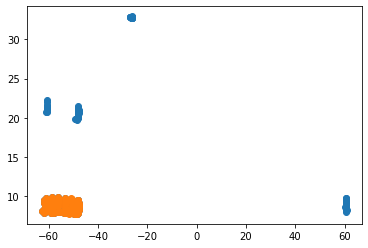

In [416]:
# plot other clusters

array1= [3, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
array2= [3, 3.0, 4.0, 4.0, 3.0, 4.0]

result=array1
result2= array2

alen = len(result)
alen2 = len(result2)

acounter=0
# counter for array el

xv1 =[]
yv1=[]
xv2 = []
yv2 = []

for i in range(initialframe, initialframe+alen):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    
    
    a = result[acounter]
    xarray = []
    yarray = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            
            if clusterid == a:
                xarray.append(xpoint)
                yarray.append(ypoint)
                
                
        # plot
        xv1.extend(xarray)
        yv1.extend(yarray)
        #plt.scatter(xarray,yarray)
    
    acounter =acounter +1
    if acounter > alen:
        break

acounter=0
for i in range(initialframe, initialframe+alen2):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    
    
    a = result2[acounter]
    xarray = []
    yarray = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            
            if clusterid == a:
                xarray.append(xpoint)
                yarray.append(ypoint)
                
                
        # plot
        xv2.extend(xarray)
        yv2.extend(yarray)
        #plt.scatter(xarray,yarray)
    
    acounter =acounter +1
    if acounter > alen2:
        break

#plt.scatter(xv2, yv2)
plt.scatter(xv1, yv1)
plt.scatter(xv2, yv2)
plt.show()



    

In [ ]:
# KF 

from numpy.linalg import inv
def predict1(x, P):
    x = np.dot(F, x) + np.dot(B, u)
    P = np.dot(F, np.dot(P, F.transpose())) + Q
    return x, P

def update1(x, P, z):
    y = z - np.dot(H,x)
    S = np.dot(H, np.dot(P, H.transpose()))
    K = np.dot(P, np.dot(H.transpose(), inv(S)))
    #print("k",K)
    #print("y", y)
    x = x+ np.dot(K,y)
    P = P - np.dot(K, np.dot(H, P))
    xs.append(x)
    cov.append(P)
    return x, P

def update2(x, P,z):
    S = np.dot(np.dot(H, P), H.transpose()) + R
    K = np.dot(np.dot(P, H.transpose()), inv(S))
    z = matrix([z])
    y = z.transpose() - np.dot(H, x)
    x = x + np.dot(K, y)
    P = P - np.dot(np.dot(K,H), P)
    return x, P



In [ ]:
# combine the measurements and the kalman filter
# average the previous cluster for single pt 
# measure the min dist from cluster
from numpy import array

dt = 1
# p_x, p_y, v_x, v_y
x1 = array(([[px0], [py0], [avx], [avy]])) 

# extra change p_x, extra change p_y, change v_x, change v_y 
u = array(([[4.0], [12.0], [0], [0]]))

P = array([[10, 0, 0 , 0], [0, 10, 0, 0], [0, 0, 100, 0], [0, 0, 0, 100]])

F = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])

#H = array([[1,0,0,0], [0,1,0,0], [0,0,0,0], [0,0,0,0]])
H = array([[1,0,0,0], [0,1,0,0]])
           
# meas noise
R = array([[0.1,0], [0,0.1]])

B = np.eye(4)

Q = np.eye(4)

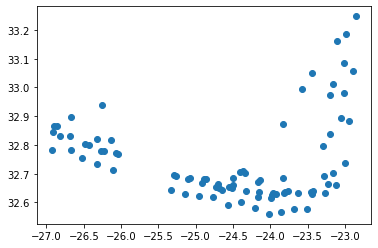

In [285]:
# plot  clusters in frame
i = 299

a = [3,4]
name = "file_out"
name = name+str(i)
name = name+".csv"
    
xarray = []
yarray = []
with open(name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    for row in csv_reader:
        clusterid = float(row[0])
        xpoint = float(row[1])
        ypoint = float(row[2])

        if clusterid in a:
            xarray.append(xpoint)
            yarray.append(ypoint)


    # plot
    xv1.extend(xarray)
    yv1.extend(yarray)

plt.scatter(xarray,yarray)
plt.show()

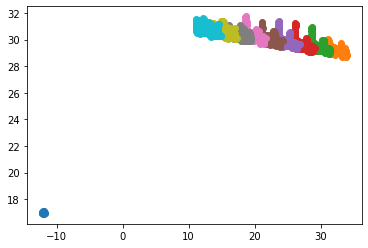

In [50]:
# plot other clusters
array1 = [6, 6.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
array2 = [6, 6.0, 8.0, 7.0, 8.0, 6.0, 7.0, 6.0, 5.0, 4.0, 5.0]

array1 =[7, 5.0, 7.0, 6.0, 5.0, 3.0, 4.0, 3.0, 3.0]
array2 =[7, 5.0, 7.0, 6.0, 7.0, 4.0, 5.0, 3.0, 3.0, 2.0, 3.0]

array1= [2, 3.0, 4.0, 3.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0]
array2= [2]

result = array1
alen = len(result)

acounter=0
# counter for array el

for i in range(initialframe, endframe):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    
    
    a = result[acounter]
    xarray = []
    yarray = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            
            if clusterid == a:
                xarray.append(xpoint)
                yarray.append(ypoint)
                
                
        # plot
        plt.scatter(xarray,yarray)
    
    acounter =acounter +1
    if acounter > alen:
        break

plt.show()
    

In [ ]:
# simulate Markov Chain


In [12]:
# rename

def findnextclusterapp(iframe, initialcluster): # frame and cluster
    datastorename = 'newdatastoreMay17.csv'
    outputmatched =0
    with open(datastorename) as datastore_csv_file:
        datastore_csv_reader = csv.reader(datastore_csv_file, delimiter=",")

        for row in datastore_csv_reader:
            
            # 1 - frame 
            framenum = float(row[0])

            # 2 - cluster id
            clusterid = float(row[1])

            matched = float(row[18])  #return this matched

            if framenum < iframe:
                continue

            if clusterid == initialcluster:
                outputmatched = matched
                return outputmatched
            
    return outputmatched

In [39]:
errorclusters

{6: [[4, 5]],
 7: [[5, 6]],
 14: [[5, 7]],
 15: [[2, 3]],
 16: [[3, 4, 5]],
 17: [[2, 3, 4]],
 18: [[2, 3]],
 20: [[2, 3]],
 22: [[3, 4]],
 23: [[2, 3, 4]],
 24: [[2, 4, 3]],
 25: [[2, 3, 5]],
 26: [[2, 4, 5]],
 27: [[4, 5]],
 28: [[2, 4]],
 29: [[2, 3]],
 30: [[2, 3], [7, 9]],
 34: [[4, 5]],
 35: [[5, 6], [3, 10, 11]],
 36: [[5, 6]],
 38: [[5, 6, 7], [8, 9, 10]],
 39: [[6, 7], [10, 11]],
 41: [[5, 6], [1, 2], [8, 11, 12]],
 43: [[8, 11]],
 44: [[1, 7], [10, 11]],
 45: [[8, 7], [11, 12]],
 46: [[5, 6]],
 47: [[2, 3]],
 48: [[5, 6]],
 51: [[1, 2]],
 52: [[1, 2]],
 54: [[1, 2]],
 56: [[1, 2]],
 57: [[1, 2]],
 58: [[1, 2]],
 59: [[1, 2]],
 60: [[1, 2]],
 61: [[1, 2]],
 62: [[1, 2]],
 63: [[1, 2]],
 66: [[1, 2], [5, 6]],
 70: [[4, 5]],
 71: [[1, 3]],
 74: [[2, 3]],
 78: [[1, 6], [10, 11], [7, 8]],
 79: [[1, 2], [6, 7]],
 91: [[8, 10]],
 97: [[2, 3]],
 99: [[3, 5]],
 100: [[1, 4]],
 102: [[7, 8, 9]],
 103: [[2, 3]],
 114: [[4, 5]],
 115: [[1, 2]],
 118: [[1, 2]],
 119: [[1, 2]],
 123: [[1, 

In [11]:
def appfindnextcluster(iframe, initialcluster): # frame and cluster
    datastorename = 'newdatastoreMay17.csv'
    outputmatched =0
    with open(datastorename) as datastore_csv_file:
        datastore_csv_reader = csv.reader(datastore_csv_file, delimiter=",")

        for row in datastore_csv_reader:
            
            # 1 - frame 
            framenum = float(row[0])

            # 2 - cluster id
            clusterid = float(row[1])

            matched = float(row[18])  #return this matched

            if framenum < iframe:
                continue

            if clusterid == initialcluster:
                outputmatched = matched
                return outputmatched
            
    return outputmatched

In [34]:
missedmatching

NameError: name 'missedmatching' is not defined

In [33]:
continuedmatching

2

In [34]:
wrongmatching

2

In [43]:
totalcomparisons

38

In [50]:
a = [5,3,8,2]
b= list(a).sort()

In [53]:
b= np.sort(a)

In [54]:
b[0]

2

In [33]:
ca = [3,4]

iframe = 2

res = []

# must repeat this function for each element in cluster array
for el in ca:
    nc = findnextcluster(iframe, el)
    res.append(nc)


4.0 is the next cluster
5.0 is the next cluster


In [96]:
# find the next cluster from our algorithm

# iterate over all the clusters in frame len1+1 to see 
# iframe is frame number 

def findnextcluster(iframe, elementclusterarray):  # iframe is the current cluster, clusterarray holds ids of similar clusters 

    ky =0 # if no next cluster
    # sort by increasing order
    #sortedarray = np.sort(clusterarray)
    
    name = "file_out"
    name = name+str(iframe)
    name1 = name+".csv"
    name2 = "file_out"+str(iframe+1)+".csv"

# clear matchfreq
    for j in range(0, mx):
        matchfreq[j] =0

    with open(name1) as csv_file:
        f =0 
        # reset hxvalues , hyvalues
        hxvalues = []
        hyvalues=[]

        countmap= {}

        csv_reader = csv.reader(csv_file, delimiter=",")

        for row in csv_reader:
            cid= float(row[0]) 
            # determine which cluster id is the highest 
            xr = round(float(row[1]))
            yr = round(float(row[2]))
            fromi = dinvlookupdict[(xr,yr)]
            # function to find highest freq 
            h1, i1 = dhighestfreq(fromi)

            if cid ==  elementclusterarray:
                countmap[i1] = 1

    obnum = 1 

    f = 0                   
    with open(name2) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            cid = float(row[0])
            xr =round(float(row[1]))
            yr = round(float(row[2]))
            fromi = dinvlookupdict[(xr,yr)]
            # next cluster 
            if cid != obnum:
                numo1 = float(obnum)
                if matchfreq[numo1] > f:
                    f = matchfreq[numo1]
                    ky = numo1
                obnum = cid

            val = countmap.get(fromi)
            if val != None:
                matchfreq[cid] =matchfreq[cid]+1


    #print(ky, "is the next cluster")     
    return ky

In [ ]:
# test this missed matching

errorclusters[12] = [4, 5] # say 5 leads to 3 => correct 

listclusterids = [4, 3.0, 4.0, 3.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0]
result =         [4, 3.0, 4.0, 3.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0]

listclusterids = [4,3,4] # frame 10 , 11,12 : len1 is 2
result = [4,3,4,3]       # frame 10, 11, 12, 13

In [ ]:
# subfunction: check error clusters
# continued matching
currentframeid = initialframe+len1
length1 = len1 # the shorter length 
v = errorclusters.get(currentframeid)
if v != None:
    errorarray = errorclusters[currentframeid]
    # look for listclusterids[initialframe+len1+1] value 
    for e in errorarray:
        if e == listclusterids[length1+1]:
            # it is correct

# missed matching
length1 = 9
v = errorclusters.get(currentframeid)
nextmatched = result[length1+1]
if v!= None:
    errorarray = errorclusters[currentframeid]
    if listclusterids[length1] in errorarray:
        # check if the next matched from other
        for e in errorarray:
            # check next matched at frame currentframeid to currentframeid+1
            enext = 
            if enext == nextmatched:
                # remove the error
                print("remove missed matching")
                


In [27]:
# pre processing step: load lidar_similarlabeledclusters.csv
import csv
# dictionary mapping framenumber to array of clusterids
errorclusters = {}

firstrow =0


lidarsim = 'lidar_similarlabeledclusters.csv'
with open(lidarsim) as lidarsim_csv_file:
    sim_csv_reader = csv.reader(lidarsim_csv_file, delimiter=",")
    for row in sim_csv_reader:
        # skip header row
        if firstrow==0:
            firstrow=1
            continue
        framenumber = int(row[0])
        arr = []
        cluster1 = row[1]
        cluster2 = row[2]
        cluster3 = row[3]
        arr.append(int(cluster1))
        if len(cluster2) > 0:
            arr.append(int(cluster2))
        if len(cluster3) >0:
            arr.append(int(cluster3))
        
        errorcode = int(row[4])
        if errorcode == 1:
            # add to dictionary
            #print("add")
            errorclusters[framenumber] = arr        

In [290]:
#THIS ONE 
# error clusters 


# pre processing step: load lidar_similarlabeledclusters.csv
import csv
# dictionary mapping framenumber to array of clusterids
errorclusters = {}

firstrow =0


#lidarsim = 'lidar_similarlabeledclusters.csv'
lidarsim = 'lidar_similarlabeledclusters_v2.csv'
with open(lidarsim) as lidarsim_csv_file:
    sim_csv_reader = csv.reader(lidarsim_csv_file, delimiter=",")
    for row in sim_csv_reader:
        # skip header row
        if firstrow==0:
            firstrow=1
            continue
        framenumber = int(row[0])
        arr = []
        cluster1 = row[1]
        cluster2 = row[2]
        cluster3 = row[3]
        arr.append(int(cluster1))
        if len(cluster2) > 0:
            arr.append(int(cluster2))
        if len(cluster3) >0:
            arr.append(int(cluster3))
        #print(row)
        errorcode = int(row[4])
        if errorcode == 1:
            # add to dictionary
            #print("add")
            v = errorclusters.get(framenumber)
            if v==None:
                errorclusters[framenumber] = [arr]
            else:
            # append additional array
                a = errorclusters[framenumber]
                alen = len(a)
                em = []
                for i in range(0, alen):
                    em.append(a[i])
                em.append(arr)
                
                errorclusters[framenumber] = em
            

In [291]:
errorclusters

{6: [[4, 5]],
 7: [[5, 6]],
 14: [[5, 7]],
 15: [[2, 3]],
 16: [[3, 4, 5]],
 17: [[2, 3, 4]],
 18: [[2, 3]],
 20: [[2, 3]],
 22: [[3, 4]],
 23: [[2, 3, 4]],
 24: [[2, 4, 3]],
 25: [[2, 3, 5]],
 26: [[2, 4, 5]],
 27: [[4, 5]],
 28: [[2, 4]],
 29: [[2, 3]],
 30: [[2, 3], [7, 9]],
 34: [[4, 5]],
 35: [[5, 6], [3, 10, 11]],
 36: [[5, 6]],
 38: [[5, 6, 7], [8, 9, 10]],
 39: [[6, 7], [10, 11]],
 41: [[5, 6], [1, 2], [8, 11, 12]],
 43: [[8, 11]],
 44: [[1, 7], [10, 11]],
 45: [[8, 7], [11, 12]],
 46: [[5, 6]],
 47: [[2, 3]],
 48: [[5, 6]],
 51: [[1, 2]],
 52: [[1, 2]],
 54: [[1, 2]],
 56: [[1, 2]],
 57: [[1, 2]],
 58: [[1, 2]],
 59: [[1, 2]],
 60: [[1, 2]],
 61: [[1, 2]],
 62: [[1, 2]],
 63: [[1, 2]],
 66: [[1, 2], [5, 6]],
 70: [[4, 5]],
 71: [[1, 3]],
 74: [[2, 3]],
 78: [[1, 6], [10, 11], [7, 8]],
 79: [[1, 2], [6, 7]],
 91: [[8, 10]],
 97: [[2, 3]],
 99: [[3, 5]],
 100: [[1, 4]],
 102: [[7, 8, 9]],
 103: [[2, 3]],
 114: [[4, 5]],
 115: [[1, 2]],
 118: [[1, 2]],
 119: [[1, 2]],
 123: [[1, 

In [41]:
v == None

False

In [374]:
totalcomparisons # divide by this number

45

In [281]:
continuedmatching

2

In [280]:
missedmatching

3

In [149]:
totalcomparisons

0

In [150]:
totclusterids

[[1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [2, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0],
 [3, 4.0, 5.0, 4.0, 5.0, 4.0, 5.0, 4.0, 4.0],
 [4, 5.0, 6.0, 5.0, 6.0, 4.0, 5.0, 4.0, 4.0],
 [5, 6.0, 7.0, 6.0, 7.0, 4.0, 5.0, 4.0, 4.0]]

In [18]:
import matplotlib.pyplot as plt

search2 =1

f is 59
f is 15
f is 16
f is 48
f is 77
f is 69
f is 123
f is 126
f is 18
f is 195


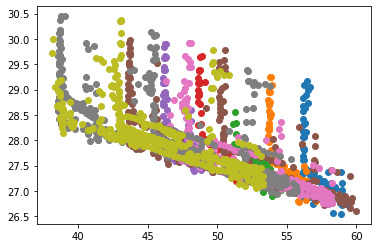

In [27]:
# may 23 2020

arrayx = []
arrayy=[]

from collections import defaultdict
import csv
import matplotlib.pyplot as plt

# keep count of total number of comparisons + number of incorrect matches
totalcomparisons = 0
incorrect = 0 


initialcluster=3

# data structure to keep track of the list of cluster ids 
listclusterids = []

listclusterids.append(initialcluster)

obnum = 0



# evaluate results for a few frames 
initialframe = 1
endframe = 10

totalmap={}

previndices=[]
currentindices=[]
totalmap = {}

finalarray=[]

xvalues = []
yvalues = []

hxvalues =[]
hyvalues= []

prevmap={}

mf = defaultdict(list)
# maximum object/cluster id in any frame
mx = 20

for j in range(0, mx):
    mf[j]=0 
    
matchfreq= mf

for i in range(initialframe, endframe):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    firstrow=0
    # clear matchfreq
    for j in range(0, mx):
        matchfreq[j] =0
    with open(name) as csv_file:
        f =0 
        # reset hxvalues , hyvalues
        hxvalues = []
        hyvalues=[]
        
        currentmap= {}
        
        csv_reader = csv.reader(csv_file, delimiter=",")
        
        if i==initialframe:
            for row in csv_reader:
                # no need for first row skip 
                clusterid = float(row[0])
                if clusterid==initialcluster:
                    xpoint = float(row[1])
                    ypoint = float(row[2])
                    #print("xpt", xpoint)
                    #print("ypt", ypoint)
                    arrayx.append(xpoint)
                    arrayy.append(ypoint)
                    xr = round(xpoint)
                    yr = round(ypoint)
                    fromi = dinvlookupdict[(xr,yr)]
                    h1, i1 = dhighestfreq(fromi)
                    prevmap[i1] = 1
            plt.scatter(arrayx, arrayy)
            # reset ky 
            ky = initialcluster
            continue
            
        for row in csv_reader:
            clusterid = float(row[0])
            
            if clusterid != obnum:
                numo1 = float(obnum)
                # append into dictionary of maps
                totalmap[numo1] = currentmap
                if matchfreq[numo1] > f:
                    f = matchfreq[numo1]
                    print("f is", f)
                    ky = numo1
                    
                    hxvalues = xvalues
                    hyvalues = yvalues
                obnum = clusterid
                
                currentindices=[]
                currentmap= {}
                
                xvalues =[]
                yvalues =[]
                # append first values
                #xvalues.append(float(row[1]))
                #yvalues.append(float(row[2]))
                
                continue
            
            xpoint = float(row[1])
            ypoint = float(row[2])
            xr = round(xpoint)
            yr = round(ypoint)
            xvalues.append(xpoint) # save to array 
            yvalues.append(ypoint)
            fromi = dinvlookupdict[(xr,yr)]
            # function to find highest freq 
            h1, i1 = dhighestfreq(fromi)
            # check outlier
            freqo =0 
            if [xr, yr] in listoutliers:
                # determine highest outlier count + coordinates
                listofoutliers = listoutliers2[fromi]
                for outlierpt in listofoutliers:
                    indexo = dinvlookupdict[(outlierpt[0], outlierpt[1])]
                    ocount = doutlier[fromi, indexo]
                    if ocount > freqo:
                        freqo = ocount
                        highindo = indexo
            # compare with dhighestfreq
            if freqo > h1:
                i1 = highindo
            # save to indices
            currentindices.append(i1) 
            # save to map
            currentmap[i1] = 1
            # check prev map
            val = prevmap.get(fromi)
            if val ==None:
                # do nothing
                if search2==0:
                    print("hi")
            else:
                numo = float(obnum)
                matchfreq[numo]= matchfreq[numo]+1
        # check f values at end of file
        numo2 = float(obnum)
        if matchfreq[numo2] > f:
            ky = numo2
            hxvalues = xvalues
            hyvalues = yvalues
            totalmap[ky]= currentmap
        finalarray.append(ky)
        # ky is the cluster id with the highest frequency
        
        plt.scatter(hxvalues, hyvalues)
        
        if len(hxvalues) ==0:
            print("0 h vals")
        if len(hxvalues) !=0:
            # set prevmap to the one 
            listclusterids.append(ky) # only append if there is next match
            prevmap = totalmap[ky]
        # obnum
        
plt.show()

In [28]:
listclusterids

[3, 4.0, 5.0, 4.0, 5.0, 4.0, 5.0, 4.0, 4.0]

In [177]:
result =[1,1, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0]

In [184]:
result = [1,1,3,2,2,2,1]

In [367]:
result = [3,2,3,1,1]

In [9]:
# kalman filter code

from numpy.linalg import inv

# from kalman filter

# prediction

def kf_predict(X, P, A, Q, B, U):
    X = np.dot(A, X) + np.dot(B, U)
    P = np.dot(A, np.dot(P, A.transpose())) + Q
    return (X, P)

def kf_update(X,P,Y,H,R):
    IM= np.dot(H,X)
    IS = R+ np.dot(H, np.dot(P, H.transpose()))
    K = np.dot(P, np.dot(H.transpose(), inv(IS)))
    X = X+ np.dot(K, (Y-IM))
    P= P - np.dot(K, np.dot(IS, K.transpose()))
    LH = gauss_pdf(Y, IM, IS)
    return (X, P, K, IM, IS, LH)


def gauss_pdf(X, M, S):
    if size(M)== 1:
        DX = X - np.tile(M, size(X))
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * np.zeros(size(M)) * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    elif size(X) == 1:
        DX = tile(X, size(M))- M
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * np.zeros(size(M))* log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    else:
        DX = X-M
        E = 0.5 * np.dot(DX.transpose(), np.dot(inv(S), DX))
        E = E + 0.5 * np.zeros((size(M, 1), size(M,1))) * log(2 * pi) + 0.5 * log(np.linalg.det(S))
        P = np.exp(-E)
    return (P[0],E[0]) 

In [10]:
import numpy as np
from numpy import *
from numpy.linalg import inv

import matplotlib.pyplot as plt

In [ ]:

# PART B STEP 3

# KF setup 

dt = 1
# p_x, p_y, v_x, v_y
x1 = array(([[px0], [py0], [avx1], [avy1]])) 

# extra change p_x, extra change p_y, change v_x, change v_y 
u = array(([[4.0], [12.0], [0], [0]]))

P = array([[10, 0, 0 , 0], [0, 10, 0, 0], [0, 0, 100, 0], [0, 0, 0, 100]])

F = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])

#H = array([[1,0,0,0], [0,1,0,0], [0,0,0,0], [0,0,0,0]])
H = array([[1,0,0,0], [0,1,0,0]])
           
# meas noise
R = array([[0.1,0], [0,0.1]])

B = np.eye(4)

Q = np.eye(4)


from collections import defaultdict

import matplotlib.pyplot as plt
import csv


# array to be plotted
arrayx = []

arrayy = []
# set tarray values as the frame number to track the evolution
tarray = []


# parameters of step 5

firstrow=0

firstrowfirstfile= 0

obnum =0

previndices=[]

currentindices=[]

totalmap = {}

arrayofarrays = []

# rename current dict to totaldict?
currentdict = {}

arrayofdicts=[]

finalarray=[]

xvalues = []
yvalues = []

hxvalues =[]
hyvalues= []

prevmap={}

# initial cluster to track 
initialcluster = 3


# must intialize matchfreq
mf = defaultdict(list)

mx = 11

for j in range(0, mx):
    mf[j]=0 

matchfreq= mf

initialframe = 1
n = 20 # ending frame 


# initialize distances map 
mapdistances = defaultdict(list)

totxvalues = defaultdict(list)
totyvalues = defaultdict(list)

f = 1000 # default value

for j in range(0, mx):
    mapdistances[j]=[]
    totxvalues[j] = []
    totyvalues[j] = []

currentdistances = []



In [ ]:
# do not need to process initial frame     
for i in range(initialframe+1, n):
    #print("i is ",i)
    name = "Cluster_Frame"
    name = name+str(i)
    name = name+".csv"
    #print(name)
    pathname = path+"/"+name
    
    firstrow=0
    
    row1 = 0
    
    # clear map
    for j in range(0, mx):
        mapdistances[j] =[]
        totxvalues[j] =[]
        totyvalues[j]=[]
    # PREDICT STEP 
    x1, P = predict1(x1, P)
    with open(pathname) as csv_file:
        
            
        m = f
        currentmap= {}
        csv_reader = csv.reader(csv_file, delimiter=",")
        
    

acounter 0
acounter 1
acounter 2
acounter 3
acounter 4


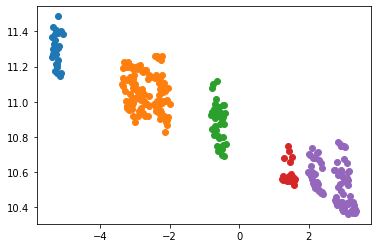

In [368]:
# plot the other clusters 

alen = len(result)

# counter for array el
acounter = 0

for i in range(initialframe, endframe):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    print("acounter", acounter)
    a = result[acounter]
    xarray = []
    yarray = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            
            if clusterid == a:
                xarray.append(xpoint)
                yarray.append(ypoint)
                
                
        # plot
        plt.scatter(xarray,yarray)
    
    acounter =acounter +1
    if acounter >= alen:
        break

plt.show()
    
            

In [92]:
#plt.clf()

In [142]:
result

[6, 6.0, 7.0, 6.0, 7.0, 5.0, 6.0]

In [137]:
listclusterids

[6, 6.0, 7.0, 6.0, 7.0, 4.0, 5.0]

In [ ]:
[6, 6.0, 7.0, 6.0, 7.0]

In [282]:
datastorename

'newdatastoreMay17.csv'

In [243]:
result

[1, 1.0, 3.0, 2.0, 2.0, 2.0, 1.0, 3.0, 3.0, 6.0]

In [193]:
framenum

8.0

In [268]:
# fix above code to take care of 1

# check accuracy with datastore.mat

initialcluster=1

#curr_cluster = 0 

initialframe = 1
endframe = 10

currentframe = initialframe

#initialcluster 

result = []
result.append(initialcluster)

prevmatched = initialcluster

boolean = 1 # if there is still a next match 

rownum = 0

# append from first frame

with open(datastorename) as datastore_csv_file:
    datastore_csv_reader = csv.reader(datastore_csv_file, delimiter=",")
    
    for row in datastore_csv_reader:
        rownum =rownum+1
        
        # 1 - frame 
        framenum = float(row[0])
        
        # 2 - cluster id
        clusterid = float(row[1])
        matched = float(row[18]) 
        
        # if past end frame
        if framenum > endframe:
            break
        
        if framenum < initialframe:
            continue
            
            
        if framenum != currentframe:
            if boolean == 0:
                print("bool break")
                print("row,", rownum)
                
                break # no more next match
                
            # append to matched
            print("row num,", rownum)
            
            # if nextmatched is nan, ignore
            if str(nextmatched) == 'nan':
                break
                
            result.append(nextmatched)
            
            prevmatched = nextmatched
            
            boolean = 0
            
            currentframe = framenum
            
        #print("frame num", framenum)
                
        
        

        
        if clusterid == prevmatched:
            nextmatched = matched
            boolean = 1 # found the next match
            
        
            
        
    
        # keep matching until there is no more next cluster
        
        

row num, 602
row num, 971
row num, 1529
row num, 2360
row num, 3288
row num, 3829
row num, 4232
row num, 5111
row num, 5820


In [363]:
str(result[8]) == 'nan'

False

In [356]:
listclusterids

[7, 5.0, 7.0, 6.0, 7.0, 4.0, 5.0, 3.0, 3.0, 2.0]

In [269]:
# update (June 6) check for nan 

# compare the two arrays: result must end first (count the mismatches if result is longer) 
numincorrect = 0

# lengths 
len1 = len(result)
len2 = len(listclusterids)

setlen = len1

if len1 < len2:
    setlen = len1
if len2 < len1:
    setlen = len2

for i in range(0, setlen):
    if result[i] != listclusterids[i]:
        numincorrect = numincorrect+1


In [270]:
numincorrect

0

In [ ]:
# now make a loop to check for all clusters 


high outlier


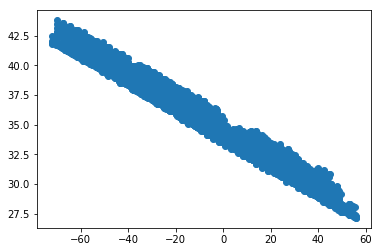

In [5]:
# dec step 5: only 1 trajectory

import matplotlib.pyplot as plt
from collections import defaultdict

# inputs 
dpath = "dec2019/Ramp/2019-9-9-15-0-0-BF1-CL1(0-18000frames)-Cluster_csv"

initialframe =1200
endframe = 1300


# initialization of data arrays
firstrow= 0
firstrowfirstfile =0
obnum =0

arrayx = []
arrayy = []
tarray = []
totalmap = {}
currentdict = {}
xvalues = []
yvalues = []

hxvalues =[]
hyvalues= []

arrhxvalues=[]
arrhyvalues=[]

prevmap={}
# must intialize matchfreq
mf = defaultdict(list)
mx =20 
for j in range(0, mx):
    mf[j]=0 
matchfreq = mf

initialcluster = 1

for i in range(initialframe, endframe):
    #name = "Cluster_Frame"
    #name = name+str(i)
    #name = name+".csv"
    # dec path
    #pathname = dpath+"/"+name
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    pathname= name
    firstrow=0
    # clear matchfreq
    for k in range(0, mx):
        matchfreq[k] = 0
    with open(pathname) as csv_file:
        f=0 # max match freq compare
        #reset 
        hxvalues= []
        hyvalues = []
        currentmap = {}
        csv_reader = csv.reader(csv_file, delimiter =",")
        if i == initialframe:
            for row in csv_reader:
                #if firstrowfirstfile==0:
                 #   firstrowfirstfile=1
                  #  continue
                clusterid =float(row[0])
                #vehped = float(row[1])
                if clusterid == initialcluster: 
                    xpoint = float(row[1])
                    ypoint = float(row[2])
                    arrayx.append(xpoint)
                    arrayy.append(ypoint)
                    arrhxvalues.append(xpoint)
                    arrhyvalues.append(ypoint)
                    xfloor = round(xpoint)
                    yfloor = round(ypoint)
                    # dec 
                    fromi = dinvlookupdict[(xfloor, yfloor)]
                    h1, i1 = dhighestfreq(fromi)
                    prevmap[i1] = 1
                    prevmap3 = prevmap
            plt.scatter(arrayx, arrayy)
            #add to arrhxvalues

            #arrhxvalues = arrayx
            #arrhyvalues = arrayy
            # test with break statement
            # check prevmap here 

            ky = initialcluster
            continue
        for row in csv_reader:
            if firstrow==0:
                firstrow=1
                continue
            vehped = float(row[1])
            if vehped == 2:
                continue # only track vehicles
            clusterid = float(row[0])
            if clusterid != obnum:
                numo1 = float(obnum)
                totalmap[numo1] = currentmap
                if matchfreq[numo1] > f:
                    f= matchfreq[numo1]
                    ky = numo1
                    hxvalues = xvalues
                    hyvalues = yvalues
                obnum = clusterid
                currentmap = {}

                xvalues = []
                yvalues = []
                # append first vals
                xvalues.append(float(row[2]))
                yvalues.append(float(row[3]))
                continue
            xpoint = float(row[2])
            ypoint = float(row[3])
            xr = round(xpoint)
            yr = round(ypoint)
            xvalues.append(xpoint)
            yvalues.append(ypoint)
            # dec dictionary, highest frequency
            fromi = dinvlookupdict[(xr,yr)]
            h1, i1 = dhighestfreq(fromi)
            # check if in "outliers from" list
            freqo = 0
            if [xr, yr] in listoutliers:
            # determine highest outlier count + coordinates
                listofoutliers = listoutliers2[fromi]
                for outlierpt in listofoutliers:
                    indexo = dinvlookupdict[(outlierpt[0], outlierpt[1])]
                    ocount = doutlier[fromi, indexo]
                    if ocount > freqo:
                        freqo = ocount
                        highindo = indexo
            # compare with dhighestfreq
            if freqo > h1:
                i1 = highindo
                print("high outlier")
            currentmap[i1] = 1
            # check prev map
            val = prevmap.get(fromi)
            if val != None:
                numo = float(obnum)
                matchfreq[numo] = matchfreq[numo]+1 
        # check f vals at end of file
        numo2 = float(obnum)
        if matchfreq[numo2] > f:
            ky = numo2
            hxvalues = xvalues
            hyvalues = yvalues
            totalmap[ky] = currentmap

        # finalarray.append(ky)
        arrhxvalues.extend(hxvalues)
        arrhyvalues.extend(hyvalues)

        # set prevmap
        if len(hxvalues) != 0:
            prevmap = totalmap[ky]
            
plt.scatter(arrhxvalues, arrhyvalues)
plt.show()

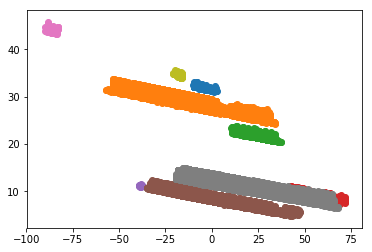

In [84]:
# dec step 5 G

import matplotlib.pyplot as plt
from collections import defaultdict

# inputs 
dpath = "dec2019/Ramp/2019-9-9-15-0-0-BF1-CL1(0-18000frames)-Cluster_csv"

initialframe =1261
endframe = 1294


# initialization of data arrays
firstrow= 0
firstrowfirstfile =0
obnum =0

arrayx = []
arrayy = []
tarray = []
totalmap = {}
currentdict = {}
xvalues = []
yvalues = []

hxvalues =[]
hyvalues= []

arrhxvalues=[]
arrhyvalues=[]

prevmap={}
# must intialize matchfreq
mf = defaultdict(list)
mx =20 
for j in range(0, mx):
    mf[j]=0 
matchfreq = mf

# first determine how many diff cars there are 
name1 = "Cluster_Frame"
name1 = name1+str(initialframe)
name1 = name1+".csv"
# dec path
pathname1 = dpath+"/"+name1

maxinitclusterid= 0 # number of vehicles to track

firstrowfirstfile1=0

with open(pathname1) as csv_file1:
    csv_reader1 = csv.reader(csv_file1, delimiter=",")
    for row1 in csv_reader1:
        if firstrowfirstfile1==0:
            firstrowfirstfile1=1
            continue
        vehped1 = float(row1[1])
        clusterid1 = float(row1[0])
        if vehped1 ==2:
            continue
        if clusterid1 > maxinitclusterid:
            maxinitclusterid = clusterid1

# loop over the clusters 
maxinitclusterid = int(maxinitclusterid)
for j in range(0, maxinitclusterid):
    initialcluster = j 
    firstrowfirstfile = 0 
    prevmap= {}
    for i in range(initialframe, endframe):
        name = "Cluster_Frame"
        name = name+str(i)
        name = name+".csv"
        # dec path
        pathname = dpath+"/"+name
        firstrow=0
        # clear matchfreq
        for k in range(0, mx):
            matchfreq[k] = 0
        with open(pathname) as csv_file:
            f=0 # max match freq compare
            #reset 
            hxvalues= []
            hyvalues = []
            currentmap = {}
            csv_reader = csv.reader(csv_file, delimiter =",")
            if i == initialframe:
                for row in csv_reader:
                    if firstrowfirstfile==0:
                        firstrowfirstfile=1
                        continue
                    clusterid =float(row[0])
                    vehped = float(row[1])
                    if clusterid == initialcluster and vehped ==1: 
                        xpoint = float(row[2])
                        ypoint = float(row[3])
                        arrayx.append(xpoint)
                        arrayy.append(ypoint)
                        arrhxvalues.append(xpoint)
                        arrhyvalues.append(ypoint)
                        xfloor = round(xpoint)
                        yfloor = round(ypoint)
                        # dec 
                        fromi = dinvlookupdict[(xfloor, yfloor)]
                        h1, i1 = dhighestfreq(fromi)
                        prevmap[i1] = 1
                        prevmap3 = prevmap
                # plt.scatter(arrayx, arrayy)
                #add to arrhxvalues
                
                #arrhxvalues = arrayx
                #arrhyvalues = arrayy
                # test with break statement
                # check prevmap here 
                
                ky = initialcluster
                continue
            for row in csv_reader:
                if firstrow==0:
                    firstrow=1
                    continue
                vehped = float(row[1])
                if vehped == 2:
                    continue # only track vehicles
                clusterid = float(row[0])
                if clusterid != obnum:
                    numo1 = float(obnum)
                    totalmap[numo1] = currentmap
                    if matchfreq[numo1] > f:
                        f= matchfreq[numo1]
                        ky = numo1
                        hxvalues = xvalues
                        hyvalues = yvalues
                    obnum = clusterid
                    currentmap = {}
                    
                    xvalues = []
                    yvalues = []
                    # append first vals
                    xvalues.append(float(row[2]))
                    yvalues.append(float(row[3]))
                    continue
                xpoint = float(row[2])
                ypoint = float(row[3])
                xr = round(xpoint)
                yr = round(ypoint)
                xvalues.append(xpoint)
                yvalues.append(ypoint)
                # dec dictionary, highest frequency
                fromi = dinvlookupdict[(xr,yr)]
                h1, i1 = dhighestfreq(fromi)
                # check if in "outliers from" list
                freqo = 0
                if [xr, yr] in listoutliers:
                # determine highest outlier count + coordinates
                    listofoutliers = listoutliers2[fromi]
                    for outlierpt in listofoutliers:
                        indexo = dinvlookupdict[(outlierpt[0], outlierpt[1])]
                        ocount = doutlier[fromi, indexo]
                        if ocount > freqo:
                            freqo = ocount
                            highindo = indexo
                # compare with dhighestfreq
                if freqo > h1:
                    i1 = highindo
                    print("high outlier")
                currentmap[i1] = 1
                # check prev map
                val = prevmap.get(fromi)
                if val != None:
                    numo = float(obnum)
                    matchfreq[numo] = matchfreq[numo]+1 
            # check f vals at end of file
            numo2 = float(obnum)
            if matchfreq[numo2] > f:
                ky = numo2
                hxvalues = xvalues
                hyvalues = yvalues
                totalmap[ky] = currentmap
                
            # finalarray.append(ky)
            arrhxvalues.extend(hxvalues)
            arrhyvalues.extend(hyvalues)
            
            # set prevmap
            if len(hxvalues) != 0:
                prevmap = totalmap[ky]
                
    # at end of this j 
    plt.scatter(arrhxvalues, arrhyvalues)
    
    arrhxvalues = []
    arrhyvalues= []
    
#plt.savefig("orig_method_1166to1171", format='png')
plt.show()

In [81]:
# determine the number of ids in initial frame

dpath = "dec2019/Ramp/2019-9-9-15-0-0-BF1-CL1(0-18000frames)-Cluster_csv"


initialframe =1400
endframe = 1500

name1 = "Cluster_Frame"
name1 = name1+str(initialframe)
name1 = name1+".csv"
# dec path
pathname1 = dpath+"/"+name1

maxinitclusterid= 0 # number of vehicles to track

firstrowfirstfile1=0


with open(pathname1) as csv_file1:
    csv_reader1 = csv.reader(csv_file1, delimiter=",")
    for row1 in csv_reader1:
        if firstrowfirstfile1==0:
            firstrowfirstfile1=1
            continue
        vehped1 = float(row1[1])
        clusterid1 = float(row1[0])
        if vehped1 ==2:
            continue
        if clusterid1 > maxinitclusterid:
            maxinitclusterid = clusterid1
            
print(maxinitclusterid)

7.0


In [7]:
# average length of trajectory to be saved
trajectory_lengths = []

In [90]:
trajectory_lengths.append(tlength)

('tlength', 1)
('frame num', 1427)
('tlength', 2)
('frame num', 1437)
('tlength', 3)
('frame num', 1438)
('tlength', 4)
('frame num', 1439)
('tlength', 5)
('frame num', 1440)
high outlier
high outlier
high outlier
high outlier
high outlier
high outlier
high outlier
high outlier
high outlier
high outlier
high outlier
high outlier
high outlier
high outlier
high outlier
high outlier
('tlength', 6)
('frame num', 1441)
('tlength', 7)
('frame num', 1453)
('tlength', 8)
('frame num', 1454)
('tlength', 9)
('frame num', 1486)
('tlength', 10)
('frame num', 1487)
('tlength', 11)
('frame num', 1488)
('tlength', 12)
('frame num', 1489)
('tlength', 13)
('frame num', 1490)


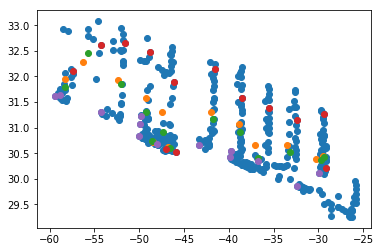

In [8]:
# save average x, y values of each frame to an array
import numpy as np

xv = []
yv = []


xmedian=[]
ymedian=[]

x_largest = []
y_largest = []

x_smallest = []
y_smallest = []

xlargest_x = []
xlargest_y = []
xsmallest_x = []
xsmallest_y = []

ylargest_x = []
ylargest_y = []
ysmallest_x = []
ysmallest_y = []

import matplotlib.pyplot as plt
from collections import defaultdict

# inputs 
dpath = "dec2019/Ramp/2019-9-9-15-0-0-BF1-CL1(0-18000frames)-Cluster_csv"

initialframe =1400
endframe = 1500


# initialization of data arrays
firstrow= 0
firstrowfirstfile =0
obnum =0

arrayx = []
arrayy = []
tarray = []
totalmap = {}
currentdict = {}
xvalues = []
yvalues = []

hxvalues =[]
hyvalues= []

arrhxvalues=[]
arrhyvalues=[]

prevmap={}
# must intialize matchfreq
mf = defaultdict(list)
mx =20 
for j in range(0, mx):
    mf[j]=0 
matchfreq = mf


initialcluster = 6

tlength = 0

for i in range(initialframe, endframe):
    name = "Cluster_Frame"
    name = name+str(i)
    name = name+".csv"
    # dec path
    pathname = dpath+"/"+name
    firstrow=0
    # clear matchfreq
    for k in range(0, mx):
        matchfreq[k] = 0
    with open(pathname) as csv_file:
        f=0 # max match freq compare
        #reset 
        hxvalues= []
        hyvalues = []
        currentmap = {}
        csv_reader = csv.reader(csv_file, delimiter =",")
        if i == initialframe:
            for row in csv_reader:
                if firstrowfirstfile==0:
                    firstrowfirstfile=1
                    continue
                clusterid =float(row[0])
                vehped = float(row[1])
                if clusterid == initialcluster and vehped ==1: 
                    xpoint = float(row[2])
                    ypoint = float(row[3])
                    arrayx.append(xpoint)
                    arrayy.append(ypoint)
                    arrhxvalues.append(xpoint)
                    arrhyvalues.append(ypoint)
                    xfloor = round(xpoint)
                    yfloor = round(ypoint)
                    # dec 
                    fromi = dinvlookupdict[(xfloor, yfloor)]
                    h1, i1 = dhighestfreq(fromi)
                    prevmap[i1] = 1
                    prevmap3 = prevmap
            # plt.scatter(arrayx, arrayy)
            #add to arrhxvalues

            #arrhxvalues = arrayx
            #arrhyvalues = arrayy
            # test with break statement
            # check prevmap here 

            ky = initialcluster
            continue
        for row in csv_reader:
            if firstrow==0:
                firstrow=1
                continue
            vehped = float(row[1])
            if vehped == 2:
                continue # only track vehicles
            clusterid = float(row[0])
            if clusterid != obnum:
                numo1 = float(obnum)
                totalmap[numo1] = currentmap
                if matchfreq[numo1] > f:
                    f= matchfreq[numo1]
                    ky = numo1
                    hxvalues = xvalues
                    hyvalues = yvalues
                obnum = clusterid
                currentmap = {}

                xvalues = []
                yvalues = []
                # append first vals
                xvalues.append(float(row[2]))
                yvalues.append(float(row[3]))
                continue
            xpoint = float(row[2])
            ypoint = float(row[3])
            xr = round(xpoint)
            yr = round(ypoint)
            xvalues.append(xpoint)
            yvalues.append(ypoint)
            # dec dictionary, highest frequency
            fromi = dinvlookupdict[(xr,yr)]
            h1, i1 = dhighestfreq(fromi)
            # check if in "outliers from" list
            freqo = 0
            if [xr, yr] in listoutliers:
            # determine highest outlier count + coordinates
                listofoutliers = listoutliers2[fromi]
                for outlierpt in listofoutliers:
                    indexo = dinvlookupdict[(outlierpt[0], outlierpt[1])]
                    ocount = doutlier[fromi, indexo]
                    if ocount > freqo:
                        freqo = ocount
                        highindo = indexo
            # compare with dhighestfreq
            if freqo > h1:
                i1 = highindo
                print("high outlier")
            currentmap[i1] = 1
            # check prev map
            val = prevmap.get(fromi)
            if val != None:
                numo = float(obnum)
                matchfreq[numo] = matchfreq[numo]+1 
        # check f vals at end of file
        numo2 = float(obnum)
        if matchfreq[numo2] > f:
            ky = numo2
            hxvalues = xvalues
            hyvalues = yvalues
            totalmap[ky] = currentmap

        # finalarray.append(ky)
        arrhxvalues.extend(hxvalues)
        arrhyvalues.extend(hyvalues)
        
        if len(hxvalues) != 0:
        # calc average 
            mean_x = np.mean(hxvalues)
            mean_y = np.mean(hyvalues)
            # try median 
            xv.append(mean_x)
            yv.append(mean_y)
            
            xmedian.append(np.median(hxvalues))
            ymedian.append(np.median(hyvalues))
            
            # np. argmax  in x 
            amx = np.argmax(hxvalues)        
            xlargest_x.append(np.max(hxvalues))
            xlargest_y.append(hyvalues[amx])
            
            x_largest.append(np.max(hxvalues))
            y_largest.append(hyvalues[amx])
            
            # in y            
            amy =np.argmax(hyvalues)
            
            ylargest_x.append(hxvalues[amy])
            ylargest_y.append(hyvalues[amy])
            
            y_largest.append(np.max(hyvalues))
            x_largest.append(hxvalues[amy])

            # smallest
            amin_x =  np.argmin(hxvalues)
            
            xsmallest_x.append(hxvalues[amin_x])
            xsmallest_y.append(hyvalues[amin_x])
            
            x_smallest.append(np.min(hxvalues))
            y_smallest.append(hyvalues[amin_x])
            
            amin_y = np.argmin(hyvalues)
            
            ysmallest_x.append(hxvalues[amin_y])
            ysmallest_y.append(hyvalues[amin_y])
            
            y_smallest.append(np.min(hyvalues))
            x_smallest.append(hxvalues[amin_y])
            
            

        # set prevmap
        if len(hxvalues) != 0:
            prevmap = totalmap[ky]
            tlength = tlength+1 
            print("tlength",tlength)
            print("frame num", i)

# at end of this j 
plt.scatter(arrhxvalues, arrhyvalues)
plt.scatter(xv, yv)
plt.scatter(xmedian, ymedian)

plt.scatter(xlargest_x, xlargest_y)
plt.scatter(xsmallest_x, xsmallest_y)

plt.show()

trajectory_lengths.append(tlength)

After testing,
Note: how to count if the clusters follow the same trajectory ?

In [86]:
mse_accurate

[0.021684879889048877,
 0.076151156265576683,
 0.013961762363116954,
 0.0065239452047027198,
 0.018658465988971713,
 0.00098054744306483245,
 0.024899128106995266,
 0.036557757587727627,
 0.055932813136325005,
 0.5932104034038056,
 0.0030959145021742327,
 0.0059090497701142731,
 0.25779508226758802,
 0.096107933858943367,
 0.032986603139749715,
 0.010732473667155195,
 0.0029310587554217549,
 0.18904179577861724,
 0.098532783989797701,
 0.0034549153124649708,
 0.16913198850406974,
 0.042999621691602388,
 0.0042275997138289893,
 0.0001613500189089996,
 0.048683189380953201,
 0.013471558365975626,
 0.013691783117217292,
 0.0016024349082737529]

In [63]:
# start saving the values of errors to a dictionary 
# frames as key 
# errors as values

# accurate dictionary 
r2_accurate = []
mse_accurate = []
# not accurate dictionary 

r2_inaccurate = []
mse_inaccurate = []

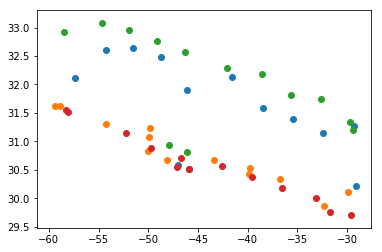

In [9]:
plt.scatter(xlargest_x, xlargest_y)
plt.scatter(xsmallest_x, xsmallest_y)

plt.scatter(ylargest_x, ylargest_y)
plt.scatter(ysmallest_x, ysmallest_y)

plt.show()

In [46]:
array(xlargest_x).shape

(29,)

In [ ]:
# accuracy from supervised labeling. 

In [17]:
from numpy import *
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [1]:
r2_accurate

NameError: name 'r2_accurate' is not defined

In [62]:
# indicate accuracy 
a_ind = 1 # 1 is accurate

# starting frame
s_frame = 1300 

In [95]:

axsmallest_x = array(xsmallest_x)
axsmallest_y = array(xsmallest_y)
a_xsmallestx = axsmallest_x.reshape(axsmallest_x.shape[0], 1)

lr2 = LinearRegression()
lr2.fit(a_xsmallestx, axsmallest_y)

pred2 = lr2.predict(a_xsmallestx)

if a_ind == 1:
    mse_accurate.append(mean_squared_error(axsmallest_y, pred2))
    r2_accurate.append(r2_score(axsmallest_y, pred2))
else:
    mse_inaccurate.append(mean_squared_error(axsmallest_y, pred2))
    r2_inaccurate.append(r2_score(axsmallest_y, pred2))


xlargest_x = array(xlargest_x)
xlargest_y = array(xlargest_y)

a_xlargestx =xlargest_x.reshape(xlargest_x.shape[0],1)

lr = LinearRegression()
lr.fit(a_xlargestx, xlargest_y)

#print(lr.score(a_xlargestx, xlargest_y))
ay_pred = lr.predict(a_xlargestx)

print("xlargest MSE:",mean_squared_error(xlargest_y, ay_pred))

print("xlargest r2:",r2_score(xlargest_y, ay_pred))

if a_ind == 1:
    mse_accurate.append(mean_squared_error(xlargest_y, ay_pred))
    r2_accurate.append(r2_score(xlargest_y, ay_pred))
else:
    mse_inaccurate.append(mean_squared_error(xlargest_y, ay_pred))
    r2_inaccurate.append(r2_score(xlargest_y, ay_pred))
    
aylargest_x = array(ylargest_x)
aylargest_y = array(ylargest_y)

a_ylargestx = aylargest_x.reshape(aylargest_x.shape[0], 1)

lr3 = LinearRegression()
lr3.fit(a_ylargestx, aylargest_y)

pred3 = lr3.predict(a_ylargestx)

if a_ind == 1:
    mse_accurate.append(mean_squared_error(aylargest_y, pred3))
    r2_accurate.append(r2_score(aylargest_y, pred3))
else:
    mse_inaccurate.append(mean_squared_error(aylargest_y, pred3))
    r2_inaccurate.append(r2_score(aylargest_y, pred3))

aysmallest_x = array(ysmallest_x)
aysmallest_y = array(ysmallest_y)

a_ysmallestx = aysmallest_x.reshape(aysmallest_x.shape[0], 1)
lr4 = LinearRegression()

lr4.fit(a_ysmallestx, aysmallest_y)

pred4 = lr4.predict(a_ysmallestx)

if a_ind == 1:
    mse_accurate.append(mean_squared_error(aysmallest_y, pred4))
    r2_accurate.append(r2_score(aysmallest_y, pred4))
else:
    mse_inaccurate.append(mean_squared_error(aysmallest_y, pred4))
    r2_inaccurate.append(r2_score(aysmallest_y, pred4))
    


('xlargest MSE:', 0.26824632556211075)
('xlargest r2:', 0.98396463005614132)


In [ ]:
# plot  where the MSE / r2 close to threshold

('xlargest MSE:', 0.042999621691602388)
('xlargest r2:', 0.0096018405075938285)
('xsmallest MSE:', 0.16913198850406974)
('xsmallest r2:', 0.66062639858031713)
('ylargest MSE:', 0.0042275997138289893)
('ylargest r2:', 0.94628123427844868)
('ysmallest MSE:', 0.0001613500189089996)
('ysmallest r2:', 0.99640122351897742)


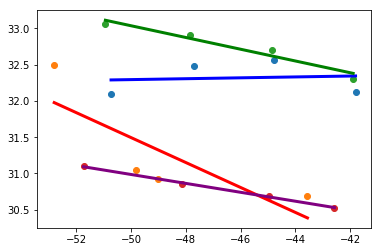

In [79]:
# step 6

# regression on xlargest, xsmallest, ylargest, ysmallest

# check if the vehicle stays in place
 
xlargest_x = array(xlargest_x)
xlargest_y = array(xlargest_y)

a_xlargestx =xlargest_x.reshape(xlargest_x.shape[0],1)

lr = LinearRegression()
lr.fit(a_xlargestx, xlargest_y)

#print(lr.score(a_xlargestx, xlargest_y))


ay_pred = lr.predict(a_xlargestx)

print("xlargest MSE:",mean_squared_error(xlargest_y, ay_pred))

print("xlargest r2:",r2_score(xlargest_y, ay_pred))


plt.scatter(xlargest_x, xlargest_y)
plt.plot(xlargest_x, ay_pred, color='blue', linewidth=3)

# xsmallest 
axsmallest_x = array(xsmallest_x)
axsmallest_y = array(xsmallest_y)
a_xsmallestx = axsmallest_x.reshape(axsmallest_x.shape[0], 1)

lr2 = LinearRegression()
lr2.fit(a_xsmallestx, axsmallest_y)

pred2 = lr2.predict(a_xsmallestx)

print("xsmallest MSE:",mean_squared_error(axsmallest_y, pred2))

print("xsmallest r2:",r2_score(axsmallest_y, pred2))


plt.scatter(xsmallest_x, xsmallest_y)
plt.plot(xsmallest_x, pred2, color='red', linewidth=3)

# ylargest

aylargest_x = array(ylargest_x)
aylargest_y = array(ylargest_y)

a_ylargestx = aylargest_x.reshape(aylargest_x.shape[0], 1)

lr3 = LinearRegression()
lr3.fit(a_ylargestx, aylargest_y)

pred3 = lr3.predict(a_ylargestx)

print("ylargest MSE:",mean_squared_error(aylargest_y, pred3))

print("ylargest r2:",r2_score(aylargest_y, pred3))

plt.scatter(ylargest_x, ylargest_y)
plt.plot(ylargest_x, pred3, color='green', linewidth=3)


# ysmallest 
aysmallest_x = array(ysmallest_x)
aysmallest_y = array(ysmallest_y)

a_ysmallestx = aysmallest_x.reshape(aysmallest_x.shape[0], 1)
lr4 = LinearRegression()

lr4.fit(a_ysmallestx, aysmallest_y)

pred4 = lr4.predict(a_ysmallestx)

print("ysmallest MSE:",mean_squared_error(aysmallest_y, pred4))

print("ysmallest r2:",r2_score(aysmallest_y, pred4))

plt.scatter(ysmallest_x, ysmallest_y)
plt.plot(ysmallest_x, pred4, color='purple', linewidth=3)

plt.show()

In [ ]:
2

0.924838075711
0.00288227189167
0.924838075711


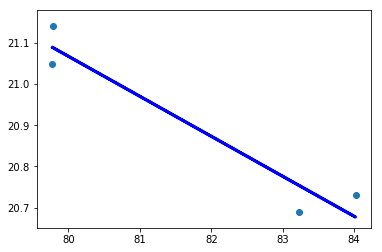

In [139]:
# regression on xlargest, xsmallest, ylargest, ysmallest


xlargest_x = array(xlargest_x)
xlargest_y = array(xlargest_y)

a_xlargestx =xlargest_x.reshape(xlargest_x.shape[0],1)

lr = LinearRegression()
lr.fit(a_xlargestx, xlargest_y)

print(lr.score(a_xlargestx, xlargest_y))


ay_pred = lr.predict(a_xlargestx)

print(mean_squared_error(xlargest_y, ay_pred))

print(r2_score(xlargest_y, ay_pred))


plt.scatter(xlargest_x, xlargest_y)
plt.plot(xlargest_x, ay_pred, color='blue', linewidth=3)
plt.show()


In [125]:
a = [2,3,4,5,6,7]
np.argmin(a)

0

In [138]:
# analyze the difference in scores 
# make a plot 

from sklearn.metrics import mean_squared_error, r2_score


In [123]:
# find the limits of x 
slim_x = np.min(arrhxvalues)
blim_x = np.max(arrhxvalues) 
print(slim_x)
print(blim_x)

# interval 
x_interval = 0.1(lim_x - slim_x)
print(x_interval)

# for 1 to 10 
for i in range(1,10):
    

69.217
89.215


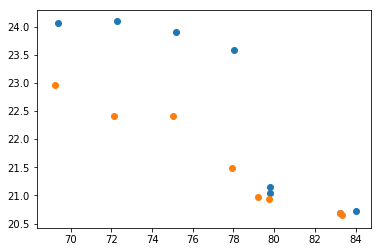

In [127]:
plt.scatter(x_largest, y_largest)
plt.scatter(x_smallest, y_smallest)
plt.show()

In [119]:
np.max([1,2,3])
np.min([1,2,3])

1

In [ ]:
# draw a line through the highest y values + a line through lowest y values




In [86]:
ar =[]
ar.append(np.mean([]))

In [87]:
ar

[nan]

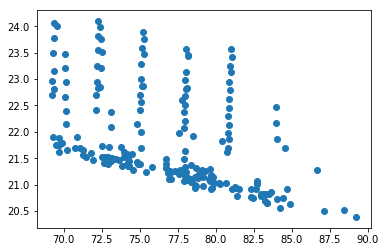

In [80]:
plt.show()